In [1]:
import mlflow
import xarray as xr
import matplotlib.pyplot as plt
from utils import select_experiment, select_run

%env MLFLOW_TRACKING_URI /scratch/ag7531/mlruns

env: MLFLOW_TRACKING_URI=/scratch/ag7531/mlruns


In [2]:
%env MLFLOW_TRACKING_URI

'/scratch/ag7531/mlruns'

In [3]:
exp_id, _ = select_experiment()

7 :  Unet
21 :  modelsv1
6 :  multiregion
3 :  multiregions
19 :  data-global
14 :  forcingdatav3
17 :  meeting22july
5 :  regionsfortraining
2 :  training
23 :  Default
4 :  default
13 :  forcingdatav2
16 :  meeting15july
22 :  parameterized
20 :  test_global
9 :  forcingdata1pct
12 :  test
15 :  datacm21
8 :  arctan
18 :  forcing-data-global
Select the id of an experiment: 22


In [4]:
runs=mlflow.search_runs(experiment_ids=(exp_id,))

In [5]:
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,params.boundary,params.n_years,params.factor,params.parameterization,params.every,params.param_amp,params.zero_sum,params.every_noise,tags.mlflow.source.git.commit,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.user
0,b3da8868a9e243f7a7043e81bfdcd9e8,22,FINISHED,/scratch/ag7531/mlruns/22/b3da8868a9e243f7a704...,2021-02-08 20:20:14.299000+00:00,2021-02-13 08:37:56.476000+00:00,NO_SLIP,10,1,False,None,None,None,None,f9ba0c47b91cc3ad56eb3f417e0fe5b5e6928851,LOCAL,/home/ag7531/code/swe_stochastic_param/spinupP...,ag7531
1,1597b8188e2b47d4b3349424adef80d0,22,RUNNING,/scratch/ag7531/mlruns/22/1597b8188e2b47d4b334...,2021-02-08 18:13:57.456000+00:00,NaT,NO_SLIP,10,1,False,None,None,None,None,f9ba0c47b91cc3ad56eb3f417e0fe5b5e6928851,LOCAL,/home/ag7531/code/swe_stochastic_param/spinupP...,ag7531
2,b9f05f66b99a49e6afda0cf74fb56168,22,FINISHED,/scratch/ag7531/mlruns/22/b9f05f66b99a49e6afda...,2021-02-08 14:06:05.782000+00:00,2021-02-08 16:13:59.933000+00:00,NO_SLIP,10,4,True,4,1.0,False,4,f9ba0c47b91cc3ad56eb3f417e0fe5b5e6928851,LOCAL,spinupParameterized.py,ag7531
3,79f01ccc4b1147d4908f15d4decf3bc2,22,RUNNING,/scratch/ag7531/mlruns/22/79f01ccc4b1147d4908f...,2021-02-08 13:24:35.161000+00:00,NaT,NO_SLIP,10,4,True,4,1.0,False,4,f9ba0c47b91cc3ad56eb3f417e0fe5b5e6928851,LOCAL,spinupParameterized.py,ag7531
4,5a5f46f3178b445b9ee2599c4db87134,22,FINISHED,/scratch/ag7531/mlruns/22/5a5f46f3178b445b9ee2...,2021-02-03 06:19:52.655000+00:00,2021-02-03 08:27:00.429000+00:00,FREE_SLIP,10,4,True,4,1.0,False,4,f9ba0c47b91cc3ad56eb3f417e0fe5b5e6928851,LOCAL,spinupParameterized.py,ag7531
5,9fc924bdcd894660a18cc2ae79d88a4a,22,FINISHED,/scratch/ag7531/mlruns/22/9fc924bdcd894660a18c...,2021-02-03 06:15:38.465000+00:00,2021-02-03 07:33:44.720000+00:00,FREE_SLIP,10,4,False,None,None,None,None,f9ba0c47b91cc3ad56eb3f417e0fe5b5e6928851,LOCAL,/home/ag7531/code/swe_stochastic_param/spinupP...,ag7531
6,98c4b18a762c48e0aa2767c35a82393f,22,FINISHED,/scratch/ag7531/mlruns/22/98c4b18a762c48e0aa27...,2021-02-02 13:54:52.931000+00:00,2021-02-02 16:13:46.361000+00:00,NO_SLIP,10,4,True,4,1.0,False,4,f9ba0c47b91cc3ad56eb3f417e0fe5b5e6928851,LOCAL,spinupParameterized.py,ag7531
7,861749e22f124d89a4aa9703f016b0fd,22,FINISHED,/scratch/ag7531/mlruns/22/861749e22f124d89a4aa...,2021-02-02 06:11:16.868000+00:00,2021-02-02 08:25:33.955000+00:00,NO_SLIP,10,4,True,4,1.0,False,4,f9ba0c47b91cc3ad56eb3f417e0fe5b5e6928851,LOCAL,spinupParameterized.py,ag7531
8,149a2223d62947dd9ce4ae7b2d7115c2,22,FINISHED,/scratch/ag7531/mlruns/22/149a2223d62947dd9ce4...,2021-02-02 06:07:07.330000+00:00,2021-02-02 06:07:07.472000+00:00,NO_SLIP,10,4,True,4,1.0,False,4,f9ba0c47b91cc3ad56eb3f417e0fe5b5e6928851,LOCAL,/home/ag7531/code/swe_stochastic_param/spinupP...,ag7531
9,ec8158da32004a59aae52c6bc420db74,22,FINISHED,/scratch/ag7531/mlruns/22/ec8158da32004a59aae5...,2021-02-02 06:03:37.539000+00:00,2021-02-02 07:26:15.671000+00:00,NO_SLIP,10,4,False,None,None,None,None,f9ba0c47b91cc3ad56eb3f417e0fe5b5e6928851,LOCAL,/home/ag7531/code/swe_stochastic_param/spinupP...,ag7531


In [6]:
import os
os.listdir(runs.iloc[7]['artifact_uri'])

['u_eddy_permitting_0001.nc',
 'du_eddy_permitting_0001.nc',
 'dv_eddy_permitting_0001.nc',
 'eta_eddy_permitting_0001.nc',
 'v_eddy_permitting_0001.nc']

In [7]:
def load_data_from_run(i_run: int):
    run = runs.iloc[i_run]
    filenames = os.listdir(run['artifact_uri'])
    datasets = []
    for fn in filenames:
        print(f'Loading {fn}')
        name = fn.split('_')[0]
        datasets.append(xr.open_dataset(os.path.join(run['artifact_uri'], fn)))
    return datasets

In [8]:
low_rez_datas = [load_data_from_run(i) for i in (9, 2, 6, 7)]
data_h = load_data_from_run(0)

Loading u_eddy_permitting_0001.nc


/ext3/miniconda3/envs/analysis/lib/python3.8/site-packages/xarray/backends/netCDF4_.py:378: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  attributes = {k: var.getncattr(k) for k in var.ncattrs()}


Loading du_eddy_permitting_0001.nc
Loading dv_eddy_permitting_0001.nc
Loading eta_eddy_permitting_0001.nc
Loading v_eddy_permitting_0001.nc
Loading u_eddy_permitting_0001.nc
Loading du_eddy_permitting_0001.nc
Loading dv_eddy_permitting_0001.nc
Loading eta_eddy_permitting_0001.nc
Loading v_eddy_permitting_0001.nc
Loading u_eddy_permitting_0001.nc
Loading du_eddy_permitting_0001.nc
Loading dv_eddy_permitting_0001.nc
Loading eta_eddy_permitting_0001.nc
Loading v_eddy_permitting_0001.nc
Loading u_eddy_permitting_0001.nc
Loading du_eddy_permitting_0001.nc
Loading dv_eddy_permitting_0001.nc
Loading eta_eddy_permitting_0001.nc
Loading v_eddy_permitting_0001.nc
Loading u_eddy_permitting_0001.nc
Loading du_eddy_permitting_0001.nc
Loading dv_eddy_permitting_0001.nc
Loading eta_eddy_permitting_0001.nc
Loading v_eddy_permitting_0001.nc


In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Dec  6 13:21:28 2020

@author: arthur
"""
from scipy.ndimage import gaussian_filter
import numpy as np

def coarsen(data, factor):
    data = xr.apply_ufunc(lambda x: gaussian_filter(x, factor / 2), data,
                          input_core_dims=[['x', 'y']],
                         output_cor_dims=[['x', 'y']])
    data = data.coarsen(factor)
    return data.mean()

def kinetic_energy(u: np.ndarray, v: np.ndarray, model):
    if u.shape != v.shape:
        u = model.h2mat(model.IuT.dot(u.flatten()))
        v = model.h2mat(model.IvT.dot(v.flatten()))
    return np.mean(u**2 + v**2)

def uv2Tgrid(u: np.ndarray, v: np.ndarray, model):
    if u.ndim == 3:
        uv = [uv2Tgrid(u[i, ...], v[i, ...], model)
              for i in range(u.shape[0])]
        u = np.stack((uv[i][0] for i in range(u.shape[0])))
        v = np.stack((uv[i][1] for i in range(u.shape[0])))
        return u, v
    u = model.h2mat(model.IuT.dot(u.flatten()))
    v = model.h2mat(model.IvT.dot(v.flatten()))
    return u, v

def get_kinetic_energy_ts(u: np.ndarray, v: np.ndarray, model):
    n = u.shape[0]
    kE_time_series = np.zeros(n)
    for i in range(n):
        kE_time_series[i] = kinetic_energy(u[i, ...], v[i, ...], model)
    return kE_time_series

def stream_function(u: np.ndarray, v: np.ndarray, model):
    if u.ndim == 3:
        s = [stream_function(u[i, ...], v[i, ...], model)
             for i in range(u.shape[0])]
        return np.stack(s, 0)
    if u.shape != v.shape:
        u = model.h2mat(model.IuT.dot(u.flatten()))
        v = model.h2mat(model.IvT.dot(v.flatten()))
    minus_v = -v
    s = np.cumsum(minus_v, axis=1)
    s += np.cumsum(u, axis=0)
    return s

def cum_mean(data: np.ndarray, axis=0):
    n = data.shape[axis]
    ns = np.arange(n).reshape((n, 1, 1)) + 1
    return 1 / ns * np.cumsum(data, axis)

def eke_spec_avg(u,v,dx,dy, model):
    """ Computes a wavenumber-frequency plot for 3D (t,x,y) data via radial (k = sqrt(kx**2 + ky**2)) integration. TODO: correct normalisation, so that the integral in normal space corresponds to the integral in Fourier space.
    """
    if u.shape != v.shape:
        u, v = uv2Tgrid(u, v, model)
    
    nt,ny,nx = np.shape(u)
    kx = (1/(dx))*np.hstack((np.arange(0,(nx+1)/2.),np.arange(-nx/2.+1,0)))/float(nx)
    ky = (1/(dy))*np.hstack((np.arange(0,(ny+1)/2.),np.arange(-ny/2.+1,0)))/float(ny)

    kxx,kyy = np.meshgrid(kx,ky)
    # radial distance from kx,ky = 0
    kk = np.sqrt(kxx**2 + kyy**2) 

    if nx >= ny: #kill negative wavenumbers
        k  = kx[:int(nx/2)+1]
    else:
        k  = ky[:int(ny/2)+1]

    dk = k[1] - k[0]

    # 2D FFT average
    p_eke = np.empty((nt,ny,nx))
    nxy2 = nx**2*ny**2

    for i in range(nt):
        pu = abs(np.fft.fft2(u[i,:,:]))**2/nxy2
        pv = abs(np.fft.fft2(v[i,:,:]))**2/nxy2
        p_eke[i,:,:] = pu+pv
        if ((i+1)/nt*100 % 5) < (i/nt*100 % 5):
            print(str(int((i+1)/nt*100.))+'%')
    
    p_eke_avg = .5*p_eke.mean(axis=0)

    # create radial coordinates, associated with k[i]
    rcoords = []
    for i in range(len(k)):
        rcoords.append(np.where(kk<k[i]))

    # mulitply by dk to have the corresponding integral
    eke_spec = np.zeros(len(k))
    for i in range(len(k)):
        eke_spec[i] = np.sum(p_eke_avg[rcoords[i][0],rcoords[i][1]])
    
    eke_spec = np.diff(eke_spec) / dk
    k = (k[:-1] + k[1:])/2.

    return k,eke_spec

In [10]:
import sys
sys.path.append('/home/ag7531/code/swe_stochastic_param/')
from shallowwater import ShallowWaterModel

In [11]:
size = 3840
model_l = ShallowWaterModel(Nx=size // 10 // 4, Ny=size // 10 // 4, Lx=size * 1e3, Ly = size * 1e3)
model_h = ShallowWaterModel(Nx=size // 10 // 1, Ny=size // 10 // 1, Lx=size * 1e3, Ly = size * 1e3)

--------------------------------------------
Initialising various components of the model
--------------------------------------------
	 ...init_grid:: numerical discretisation of 96x96 grid points.
	 ...init_grid:: horizontal resolution of dx = 40 km, dy = 40 km.
--> Grid initialised.
	 ...set_coriolis:: central latitude of beta-plane lat0 = 35N.
--> Coriolis calculated.
	 ...set_viscosity:: laplacian coefficient 540, biharmonic coefficient 8.6E+11.
--> Viscosity initialised.
	 ...set_forcing:: wind forcing amplitude of 0.12 Nm-2.
--> Wind forcing calculated
	 ...set_timestep:: calculated timestep is dt = 514.0 seconds.
	 ...set_timestep:: total number of iterations to run for is N_iter = 60514.
--> Time-step calculated.
--> Gradient matrices initialised.
--> Laplacian matrices initialised.
--> Interpolation matrices initialised.
--> Arakawa matrices initialised.

Done! Ready to set initial conditions.
--------------------------------------------
Initialising various components of the

In [12]:
import cmocean
def my_plot(data):
    plt.imshow(data, vmin=-1, vmax=1, origin='lower', cmap=cmocean.cm.delta)


In [13]:
# Low rez no param
new_low_rez_datas = []
for data in low_rez_datas:
    u = data[0]['u'].values
    v = data[4]['v'].values
    eta = data[3]['eta']
    u, v = uv2Tgrid(u, v, model_l)
    da_u = xr.DataArray(u, dims=eta.dims, coords=eta.coords)
    da_v = xr.DataArray(v, dims=eta.dims, coords=eta.coords)
    dataset_l = xr.Dataset(dict(u=da_u, v=da_v, eta=eta))
    dataset_l['kE'] = 1/2 * (dataset_l['u']**2 + dataset_l['v']**2)
    dataset_l = dataset_l.rename(dict(t='time'))
    new_low_rez_datas.append(dataset_l)
    print('ok')
low_rez_datas = new_low_rez_datas

/ext3/miniconda3/envs/analysis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3331: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


ok
ok
ok
ok


In [35]:
def coarsen(data, factor):
    data = xr.apply_ufunc(lambda x: gaussian_filter(x, factor / 2), data, input_core_dims=[['time']], 
                         output_core_dims=[['time']])
    data = data.coarsen(dict(x=factor, y=factor))
    return data.mean()

# high rez 
u = data_h[0]['u'].values
v = data_h[4]['v'].values
eta = data_h[3]['eta']
u, v = uv2Tgrid(u, v, model_h)
da_u = xr.DataArray(u, dims=eta.dims, coords=eta.coords)
da_v = xr.DataArray(v, dims=eta.dims, coords=eta.coords)
dataset_h = xr.Dataset(dict(u=da_u, v=da_v, eta=eta))
dataset_h = dataset_h.rename(dict(t='time'))
dataset_h = coarsen(dataset_h, 4)

/ext3/miniconda3/envs/analysis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3331: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [38]:
dataset_h['kE'] = 1/2 * (dataset_h['u']**2 + dataset_h['v']**2)

In [47]:
dataset_h['time'] = data.time

In [48]:
dataset_h

<xarray.Dataset>
Dimensions:  (time: 3599, x: 96, y: 96)
Coordinates:
  * time     (time) float64 8.584e+04 1.722e+05 ... 3.107e+08 3.108e+08
  * x        (x) float64 2e+04 6e+04 1e+05 ... 3.74e+06 3.78e+06 3.82e+06
  * y        (y) float64 2e+04 6e+04 1e+05 ... 3.74e+06 3.78e+06 3.82e+06
Data variables:
    u        (y, x, time) float64 -0.003803 -0.004656 ... 0.001897 0.001595
    v        (y, x, time) float64 0.003803 0.00463 ... -0.001301 -0.001015
    eta      (y, x, time) float64 -0.02526 -0.0269 -0.02708 ... 0.1493 0.2022
    kE       (y, x, time) float64 1.446e-05 2.156e-05 ... 2.646e-06 1.788e-06

<IPython.core.display.Javascript object>


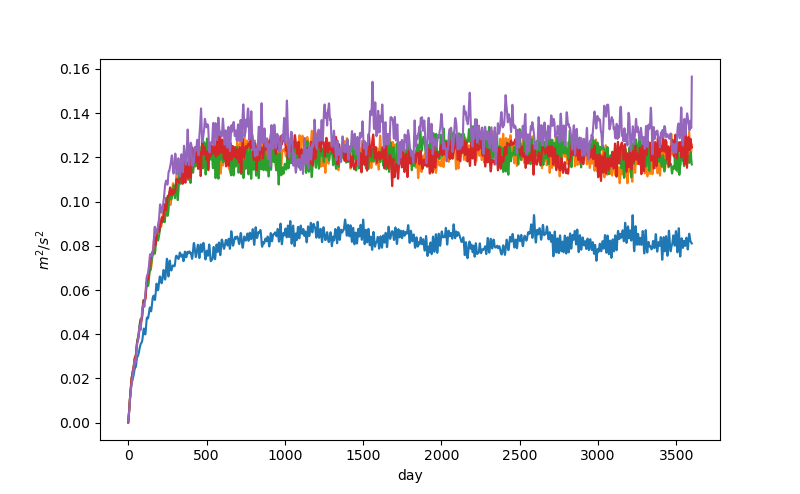

Text(0.5, 0, 'day')

In [49]:
%matplotlib notebook
plt.rcParams["figure.figsize"] = (4 * 2, 4 * 2 / 1.618)

plt.figure()
for data in low_rez_datas:
    plt.plot(data['kE'].mean(dim=('x', 'y')))
plt.plot(dataset_h['kE'].mean(dim=('x', 'y')))
plt.ylabel(r'$m^2/s^2$')
plt.xlabel('day')

In [17]:
plt.savefig('online_kE.jpg', dpi=400)

In [32]:
kE_dataset = xr.Dataset()

In [64]:
for i, data in enumerate(low_rez_datas):
    kE_dataset['low_rez_' + str(i)] = data['kE']
kE_dataset['high_rez'] = dataset_h['kE']

In [65]:
kE_dataset

<xarray.Dataset>
Dimensions:    (time: 3599, x: 96, y: 96)
Coordinates:
  * time       (time) float64 8.584e+04 1.722e+05 ... 3.107e+08 3.108e+08
  * x          (x) float64 2e+04 6e+04 1e+05 ... 3.74e+06 3.78e+06 3.82e+06
  * y          (y) float64 2e+04 6e+04 1e+05 ... 3.74e+06 3.78e+06 3.82e+06
Data variables:
    low_rez_0  (time, y, x) float64 1.503e-06 7.573e-06 ... 0.000125 9.066e-06
    low_rez_1  (time, y, x) float64 1.404e-06 6.263e-06 ... 0.0001825 3.285e-05
    low_rez_2  (time, y, x) float64 1.671e-06 7.727e-06 ... 6.87e-05 1.334e-05
    low_rez_3  (time, y, x) float64 1.528e-06 7.952e-06 ... 2.571e-05 3.315e-06
    high_rez   (y, x, time) float64 1.446e-05 2.156e-05 ... 2.646e-06 1.788e-06

In [66]:
kE_dataset['low_rez_2'].nbytes / 1e9

0.265347072

In [62]:
kE_dataset.to_zarr('/scratch/ag7531/paper_plots_data/' + var + '_' + func + '_l', mode='w')

In [18]:
dataset_h = dataset_h.isel(time=slice(1000, None))
for i in range(4):
    low_rez_datas[i] = low_rez_datas[i].isel(time=slice(1000, None))

/ext3/miniconda3/envs/analysis/lib/python3.8/site-packages/xarray/core/common.py:119: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  return bool(self.values)


AssertionError: 

In [19]:
dataset_h

<xarray.Dataset>
Dimensions:  (time: 2599, x: 96, y: 96)
Coordinates:
  * time     (time) float64 8.649e+07 8.657e+07 8.666e+07 ... 3.109e+08 3.11e+08
  * x        (x) float64 2e+04 6e+04 1e+05 ... 3.74e+06 3.78e+06 3.82e+06
  * y        (y) float64 2e+04 6e+04 1e+05 ... 3.74e+06 3.78e+06 3.82e+06
Data variables:
    u        (y, x, time) float64 0.04092 0.0391 0.03648 ... 0.001897 0.001595
    v        (y, x, time) float64 -0.04394 -0.04207 ... -0.001301 -0.001015
    eta      (y, x, time) float64 0.5202 0.5071 0.4391 ... 0.05989 0.1493 0.2022
    kE       (y, x, time) float64 0.001802 0.001649 ... 2.646e-06 1.788e-06

In [53]:
import numpy as np
import matplotlib
var = 'eta'
func = 'std'
cmaps = dict(mean=cmocean.cm.delta, std=cmocean.cm.matter)
args = dict(mean=dict(), std=dict(norm=matplotlib.colors.LogNorm()))
vmins=dict(mean=-1.96, std=0.5)
vmaxs=dict(mean=1.96, std=3)
vmins2=dict(mean=0, std=0.0001)
extent = (0, 3840, 0, 3840)

<IPython.core.display.Javascript object>


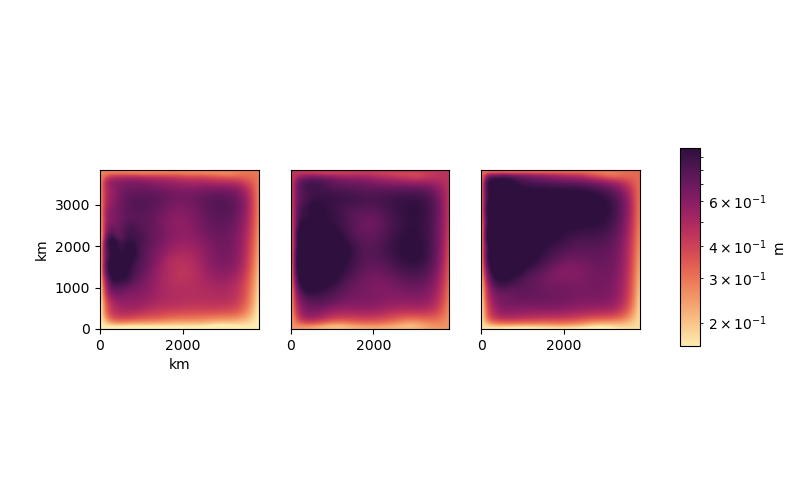

<ipython-input-54-1f2224399c17>:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = plt.imshow(getattr(low_rez_datas[i][var], func)(dim='time'), cmap=cmaps[func], **args[func],
<ipython-input-54-1f2224399c17>:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = plt.imshow(getattr(low_rez_datas[i][var], func)(dim='time'), cmap=cmaps[func], **args[func],
<ipython-input-54-1f2224399c17>:12: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = plt.imshow(getattr(dataset_h[v

In [54]:
fig = plt.figure()
# Determine limits
std_h = getattr(dataset_h[var], func)(dim='time').std()
for i in range(3):
    plt.subplot(1, 3, i + 1)
    if i < 2:
        im = plt.imshow(getattr(low_rez_datas[i][var], func)(dim='time'), cmap=cmaps[func], **args[func], 
                                                          vmin=std_h*vmins[func] + vmins2[func],
                                                          vmax=std_h*vmaxs[func], origin='lower',
                                                          extent=extent)
    else:
        im = plt.imshow(getattr(dataset_h[var], func)(dim='time'), cmap=cmaps[func], **args[func],
                                              vmin=std_h*vmins[func] + vmins2[func],
                                                          vmax=std_h*vmaxs[func], origin='lower',
                                                            extent=extent)
    if i > 0:
        im.axes.set_yticks([])
    if i == 0:
        im.axes.set_xlabel('km')
        im.axes.set_ylabel('km')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.3, 0.025, 0.4])
fig.colorbar(im, cax=cbar_ax, label='m')

In [40]:
plt.savefig(var + '_' + func + '_l.jpg', dpi=400)

<IPython.core.display.Javascript object>


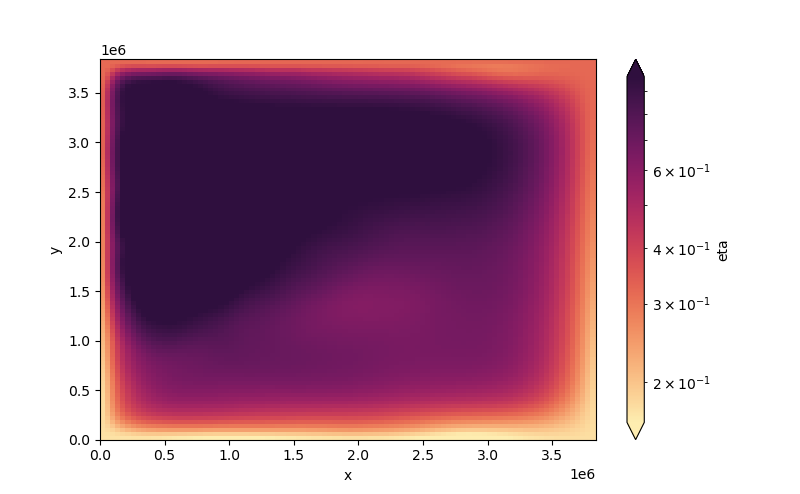

In [30]:
plt.figure()
getattr(dataset_h[var], func)(dim='time').plot(cmap=cmaps[func], **args[func],
                                              vmin=std_h*vmins[func] + vmins2[func],
                                                          vmax=std_h*vmaxs[func])


In [309]:
plt.savefig(var + '_' + func + '_h.jpg', dpi=400)

In [357]:
low_rez_datas[0]

<xarray.Dataset>
Dimensions:  (time: 2599, x: 96, y: 96)
Coordinates:
  * time     (time) float64 8.644e+07 8.652e+07 ... 3.107e+08 3.108e+08
  * x        (x) float64 2e+04 6e+04 1e+05 ... 3.74e+06 3.78e+06 3.82e+06
  * y        (y) float64 2e+04 6e+04 1e+05 ... 3.74e+06 3.78e+06 3.82e+06
Data variables:
    u        (time, y, x) float64 0.006541 0.02177 0.02714 ... 0.01377 0.003006
    v        (time, y, x) float64 -0.006529 -0.008678 ... -0.007772 -0.003016
    eta      (time, y, x) float64 -0.07136 -0.07536 -0.07812 ... 0.1798 0.1783
    kE       (time, y, x) float64 4.271e-05 0.0002747 ... 0.000125 9.066e-06

<IPython.core.display.Javascript object>


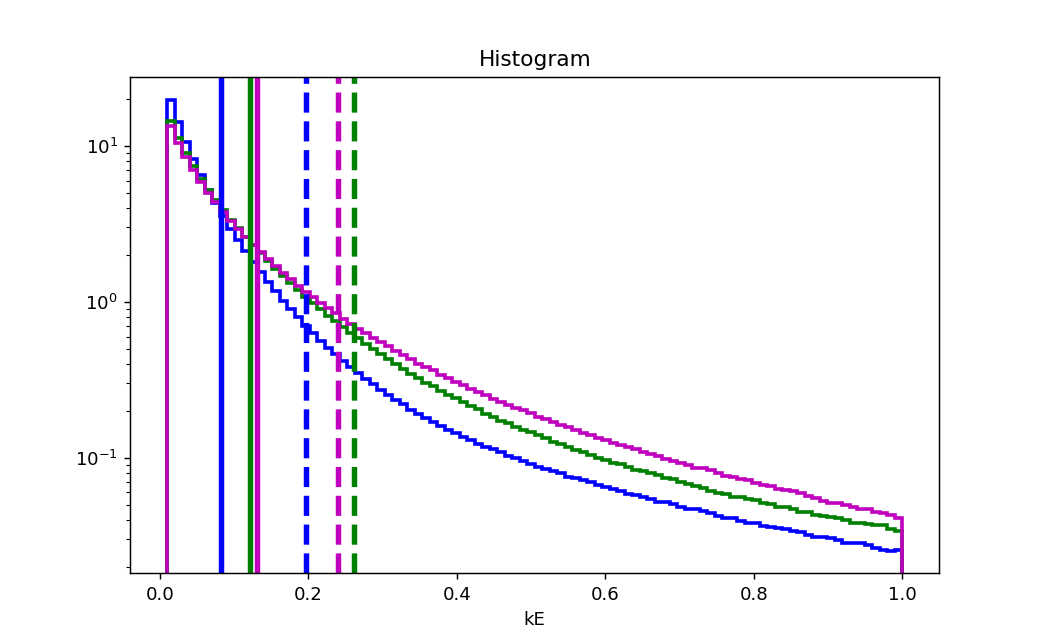

In [355]:
plt.figure()
colors=['b', 'g', 'r', 'c']
for i in range(2):
    # low rez
    m = low_rez_datas[i]['kE'].mean()
    s = low_rez_datas[i]['kE'].std()
    low_rez_datas[i]['kE'].plot.hist(bins=np.linspace(0.01, 1, 99), density=True, log=True, histtype='step', color=colors[i], linewidth=2)
    plt.axvline(m, color=colors[i], linewidth=3)
    plt.axvline(s, color=colors[i], linestyle='--', linewidth=3)
# high-rez
m = dataset_h['kE'].mean()
s = dataset_h['kE'].std()
dataset_h['kE'].plot.hist(bins=np.linspace(0.01, 1, 99), density=True, log=True, histtype='step', color='m', linewidth=2)
plt.axvline(m, color='m', linewidth=3)
plt.axvline(s, color='m', linestyle='--', linewidth=3)

In [354]:
plt.savefig('kE_hist_2.jpg', dpi=400)

<IPython.core.display.Javascript object>


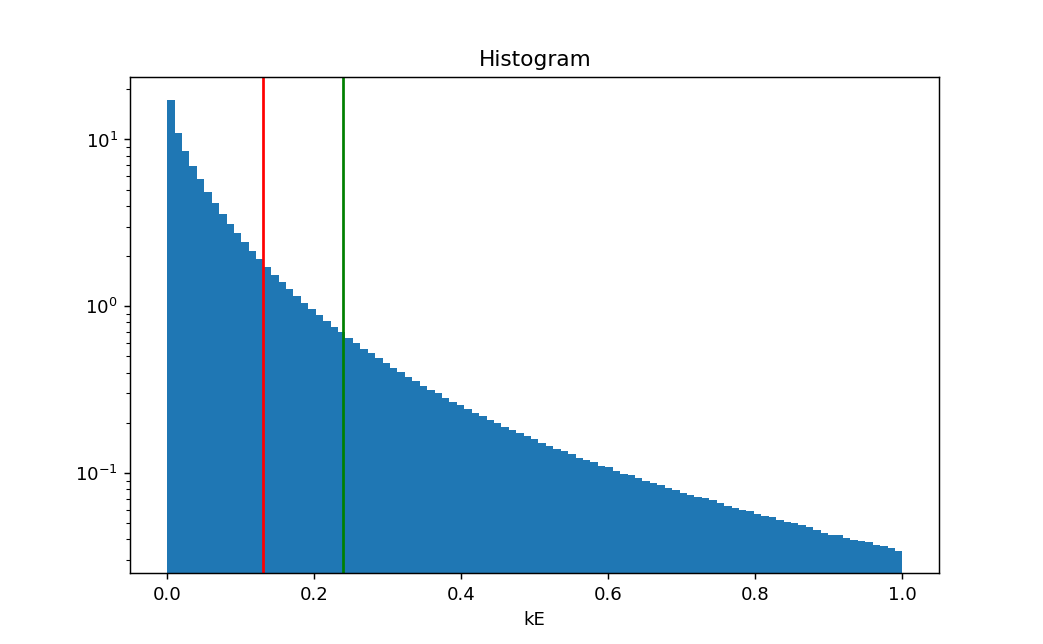

In [337]:
plt.figure()
_ = dataset_h['kE'].plot.hist(bins=np.linspace(0, 1, 100), density=True, log=True)
m = dataset_h['kE'].mean()
s = dataset_h['kE'].std()
plt.axvline(m, color='r')
plt.axvline(s, color='g')

In [338]:
plt.savefig('kE_hist_h.jpg', dpi=400)